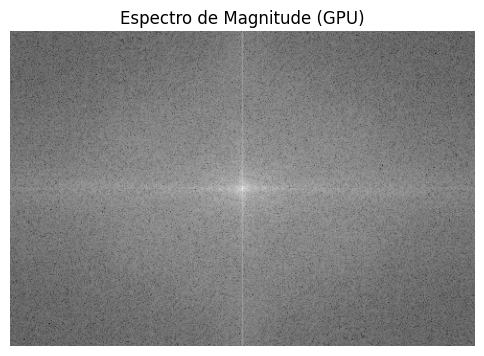

In [2]:
import cv2
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt


img_cpu = cv2.imread('paisagem.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
img = cp.array(img_cpu)

dft_gpu = cp.fft.fft2(img)
dft_shift = cp.fft.fftshift(dft_gpu)
magnitude_spectrum = 20 * cp.log10(cp.abs(dft_shift) + 1e-8)
mag_cpu = cp.asnumpy(magnitude_spectrum)

plt.figure(figsize=(6,6))
plt.imshow(mag_cpu, cmap='gray')
plt.title('Espectro de Magnitude (GPU)')
plt.axis('off')
plt.show()


# This is manually way
def dft2d(image):
    M, N = image.shape
    output = np.zeros((M, N), dtype=complex)



    for u in range(M):
        for v in range(N):
            sum_result = 0.0
            for x in range(M):
                for y in range(N):
                    angle = -2j * cmath.pi * ((u * x / M) + (v * y / N))
                    sum_result += image[x, y] * cmath.exp(angle)
            output[u, v] = sum_result
    return output